# Домашнее задание 3 - Проверка статистических гипотез и параметрические критерии

**ВАЖНО: Обязательно для каждой задачи строим график и показываем куда попадает наше значение, если в задаче нужно проверить статистическую гипотезу**
\
**При отсутствии графиков возможна полная потеря баллов за задание**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Задача 1 (1 балл)

Пусть X1,X2,…,Xn​ — независимые и одинаково распределенные случайные величины из нормального распределения с неизвестным средним μ и известной дисперсией σ^2=25. Из выборки объема n=64 получено выборочное среднее =102.
\
Проверьте гипотезу H0:μ=100 против альтернативы H1:μ>100 на уровне значимости α=0.01.
\
Вычислите p-значение этого теста.

z-статистика: 3.2
p-значение: 0.0006871379379158471
Критическое значение z: 2.3263478740408408


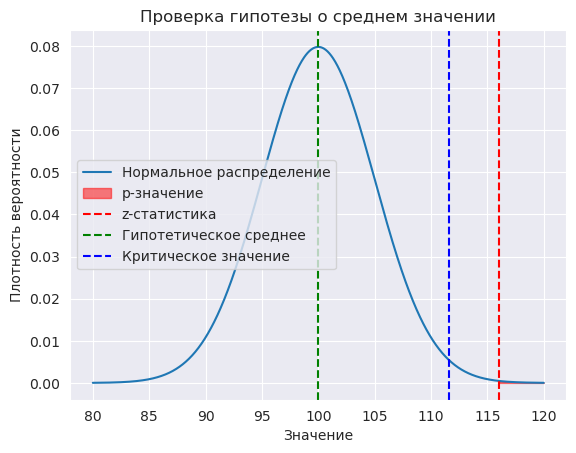

Отвергаем нулевую гипотезу H_0: μ = 100.
Принимаем альтернативную гипотезу H_1: μ > 100.


In [2]:
mu_0 = 100
sample_mean = 102
sigma = 5
n = 64
alpha = 0.01

z = (sample_mean - mu_0) / (sigma / (n ** 0.5))

p_value = stats.norm.sf(z)

print(f"z-статистика: {z}")
print(f"p-значение: {p_value}")

z_critical = stats.norm.ppf(1 - alpha)
print(f"Критическое значение z: {z_critical}")

x = np.linspace(mu_0 - 4 * sigma, mu_0 + 4 * sigma, 1000)
y = stats.norm.pdf(x, mu_0, sigma)

plt.plot(x, y, label='Нормальное распределение')
plt.fill_between(x, y, where=(x >= mu_0 + z * sigma), color='red', alpha=0.5, label='p-значение')
plt.axvline(x=mu_0 + z * sigma, color='red', linestyle='--', label='z-статистика')
plt.axvline(x=mu_0, color='green', linestyle='--', label='Гипотетическое среднее')
plt.axvline(x=mu_0 + z_critical * sigma, color='blue', linestyle='--', label='Критическое значение')

plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('Проверка гипотезы о среднем значении')
plt.legend()
plt.show()

if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу H_0: μ = {mu_0}.")
    print(f"Принимаем альтернативную гипотезу H_1: μ > {mu_0}.")
else:
    print(f"Не отвергаем нулевую гипотезу H_0: μ = {mu_0}.")

### Задача 2 (1 балл)

Даны три независимые выборки. Первая выборка объемом 35 наблюдений имеет выборочное среднее 10.2 и выборочную дисперсию 2.5. Вторая выборка объемом 30 наблюдений имеет выборочное среднее 9.8 и выборочную дисперсию 2.8. Третья выборка объемом 40 наблюдений имеет выборочное среднее 10.5 и выборочную дисперсию 3.0.

Проверьте гипотезу о том, что средние всех трех выборок равны, на уровне значимости 0.05.
Оцените статистическую значимость результатов и постройте доверительные интервалы c графиками для каждого из средних.

**Использовать попарное сравнение для получения результата**

Уровень значимости (alpha): 0.05
Сравнение 1 и 2: t-статистика = 0.9898, p-value = 0.3261
Сравнение 1 и 3: t-статистика = -0.7792, p-value = 0.4384
Сравнение 2 и 3: t-статистика = -1.6976, p-value = 0.0942
Средние 1 и 2 статистически значимо не различаются.
Средние 1 и 3 статистически значимо не различаются.
Средние 2 и 3 статистически значимо не различаются.


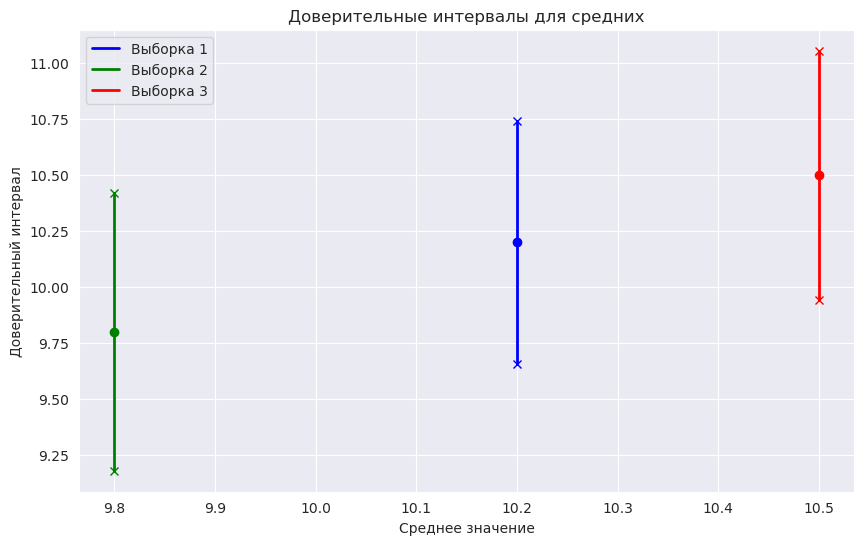

In [3]:
sample1 = np.random.normal(10.2, np.sqrt(2.5), 35)
sample2 = np.random.normal(9.8, np.sqrt(2.8), 30)
sample3 = np.random.normal(10.5, np.sqrt(3.0), 40)

mean1, mean2, mean3 = 10.2, 9.8, 10.5
var1, var2, var3 = 2.5, 2.8, 3.0
n1, n2, n3 = 35, 30, 40

alpha = 0.05

print(f"Уровень значимости (alpha): {alpha}")

# Сравнение 1 и 2
t_stat12, p_value12 = stats.ttest_ind_from_stats(mean1, np.sqrt(var1), n1, mean2, np.sqrt(var2), n2)
print(f"Сравнение 1 и 2: t-статистика = {t_stat12:.4f}, p-value = {p_value12:.4f}")

# Сравнение 1 и 3
t_stat13, p_value13 = stats.ttest_ind_from_stats(mean1, np.sqrt(var1), n1, mean3, np.sqrt(var3), n3)
print(f"Сравнение 1 и 3: t-статистика = {t_stat13:.4f}, p-value = {p_value13:.4f}")

# Сравнение 2 и 3
t_stat23, p_value23 = stats.ttest_ind_from_stats(mean2, np.sqrt(var2), n2, mean3, np.sqrt(var3), n3)
print(f"Сравнение 2 и 3: t-статистика = {t_stat23:.4f}, p-value = {p_value23:.4f}")

# Проверка статистической значимости
if p_value12 < alpha:
    print("Средние 1 и 2 статистически значимо различаются.")
else:
    print("Средние 1 и 2 статистически значимо не различаются.")

if p_value13 < alpha:
    print("Средние 1 и 3 статистически значимо различаются.")
else:
    print("Средние 1 и 3 статистически значимо не различаются.")

if p_value23 < alpha:
    print("Средние 2 и 3 статистически значимо различаются.")
else:
    print("Средние 2 и 3 статистически значимо не различаются.")

# Построение доверительных интервалов
def plot_confidence_interval(mean, sem, color='blue', label=None):
    ci = stats.t.interval(0.95, len(sample1)-1, loc=mean, scale=sem)
    plt.plot([mean, mean], ci, color=color, lw=2, label=label)
    plt.plot(mean, (ci[0]+ci[1])/2, 'o', color=color)
    plt.plot([mean, mean], [ci[0], ci[1]], 'x', color=color)

# Расчет стандартной ошибки среднего (SEM)
sem1 = np.sqrt(var1 / n1)
sem2 = np.sqrt(var2 / n2)
sem3 = np.sqrt(var3 / n3)

# Построение графиков
plt.figure(figsize=(10, 6))
plot_confidence_interval(mean1, sem1, color='blue', label='Выборка 1')
plot_confidence_interval(mean2, sem2, color='green', label='Выборка 2')
plot_confidence_interval(mean3, sem3, color='red', label='Выборка 3')

plt.title('Доверительные интервалы для средних')
plt.xlabel('Среднее значение')
plt.ylabel('Доверительный интервал')
plt.legend()
plt.grid(True)
plt.show()

### Задача 3 (1 балл)

Тестирование параметра распределения Пуассона

Выборка из 60 наблюдений была получена из распределения Пуассона с неизвестным параметром. Известно, что среднее количество наблюдений в выборке равно 4.8.

Проверьте гипотезу о том, что параметр распределения Пуассона равен 5 против альтернативы, что он меньше 5. Используйте уровень значимости 0.05.
Вычислите p-значение и сделайте вывод о гипотезе.

In [4]:
n = 60
mean_observed = 4.8
lambda_hypothesis = 5
alpha = 0.05

Z = (mean_observed - lambda_hypothesis) / np.sqrt(lambda_hypothesis / n)

p_value = stats.poisson.cdf(mean_observed * n, lambda_hypothesis * n)

print(f"Статистика критерия Z: {Z:.3f}")
print(f"p-значение: {p_value:.3f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу H0: lambda = 5.")
else:
    print("Не отвергаем нулевую гипотезу H0: lambda = 5.")

Статистика критерия Z: -0.693
p-значение: 0.255
Не отвергаем нулевую гипотезу H0: lambda = 5.


In [5]:
critical_value = stats.poisson.ppf(alpha, lambda_hypothesis * n) / n
critical_value

4.533333333333333

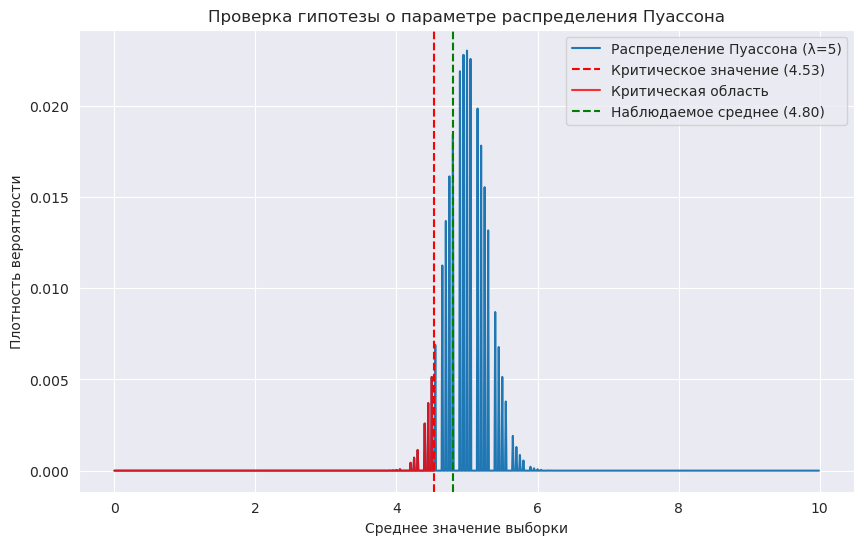

In [6]:
x = np.arange(0, 10, 0.01)
y = stats.poisson.pmf(x * n, lambda_hypothesis * n)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Распределение Пуассона (λ=5)')


plt.axvline(critical_value, color='red', linestyle='--', label=f'Критическое значение ({critical_value:.2f})')
plt.plot(x[x < critical_value], y[x < critical_value], color='red', alpha=0.8, label='Критическая область')
plt.axvline(mean_observed, color='green', linestyle='--', label=f'Наблюдаемое среднее ({mean_observed:.2f})')

plt.title('Проверка гипотезы о параметре распределения Пуассона')
plt.xlabel('Среднее значение выборки')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

### Задача 4 (1 балл)

Компания заявляет, что среднее время работы их нового аккумулятора составляет 100 часов. Независимая лаборатория протестировала 25 случайно выбранных аккумуляторов и получила среднее время работы 95 часов при стандартном отклонении 10 часов. Можно ли на уровне значимости 1% утверждать, что реальное среднее время работы аккумуляторов меньше заявленного?

t-статистика: -2.5000
Критическое значение t: -2.4922
Отвергаем нулевую гипотезу. Реальное среднее время работы аккумуляторов меньше заявленного.


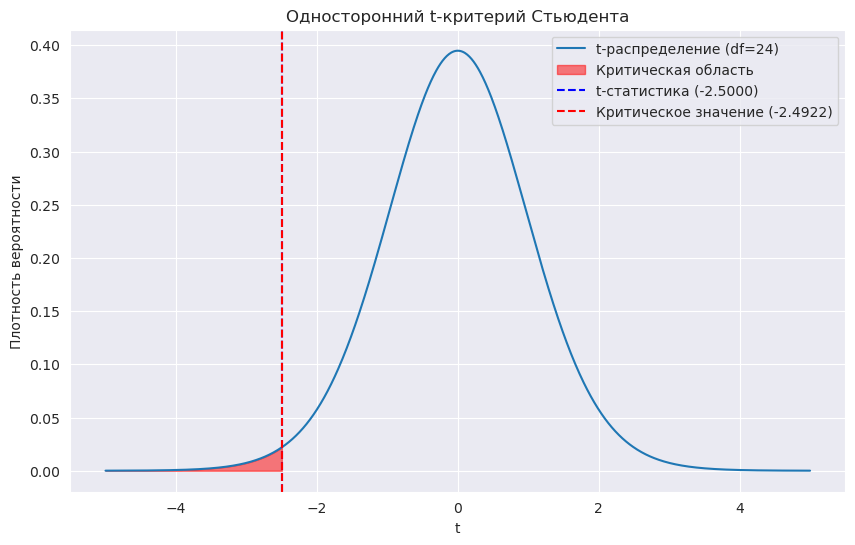

In [7]:
sample_mean = 95
sample_std = 10
n = 25
claimed_mean = 100
alpha = 0.01

t_stat = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))

df = n - 1
critical_t = stats.t.ppf(alpha, df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if t_stat < critical_t:
    print("Отвергаем нулевую гипотезу. Реальное среднее время работы аккумуляторов меньше заявленного.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что реальное среднее время работы аккумуляторов меньше заявленного.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x <= critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Односторонний t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 5 (1 балл)

В ходе медицинского исследования сравнивается эффективность нового препарата для снижения артериального давления с существующим. Первой группе из 30 пациентов назначают новый препарат, и среднее снижение давления составляет 8 мм рт. ст. со стандартным отклонением 2 мм рт. ст. Второй группе из 30 пациентов дают существующий препарат, и среднее снижение составляет 6 мм рт. ст. со стандартным отклонением 3 мм рт. ст. Является ли новый препарат более эффективным на уровне значимости 5%?

t-статистика: 3.0382
Критическое значение t: 1.6716
Отвергаем нулевую гипотезу. Новый препарат более эффективен.


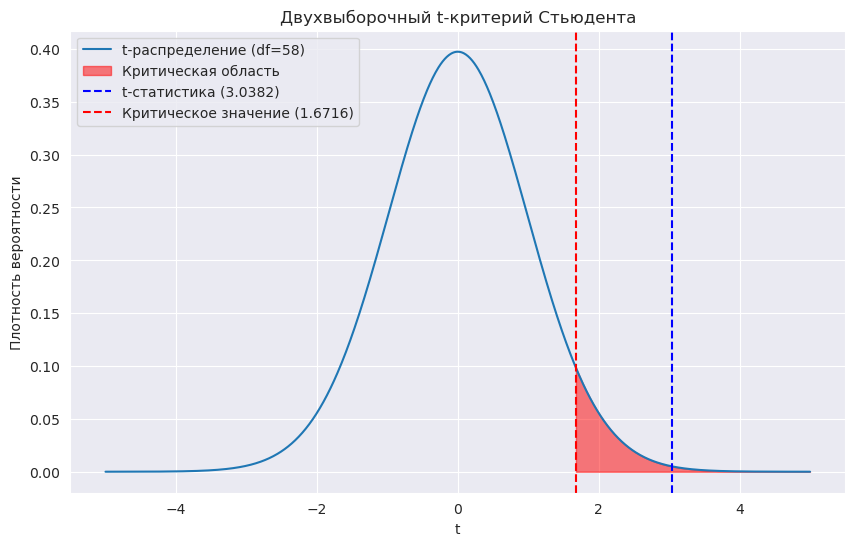

In [8]:
n1 = 30
mean1 = 8
std1 = 2

n2 = 30
mean2 = 6
std2 = 3

alpha = 0.05

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

df = n1 + n2 - 2
critical_t = stats.t.ppf(1 - alpha, df)


print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if t_stat > critical_t:
    print("Отвергаем нулевую гипотезу. Новый препарат более эффективен.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что новый препарат более эффективен.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x >= critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Двухвыборочный t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 6 (1 балл)

В университете внедрили новую методику преподавания математики и хотят оценить ее влияние на успеваемость студентов. Средний балл по математике в предыдущие годы был 75. После внедрения методики группа из 50 студентов получила средний балл 78 с стандартным отклонением 5. Проверить на уровне значимости 1%, улучшилась ли успеваемость студентов.

t-статистика: 4.2426
Критическое значение t: 2.4049
Отвергаем нулевую гипотезу. Успеваемость студентов улучшилась.


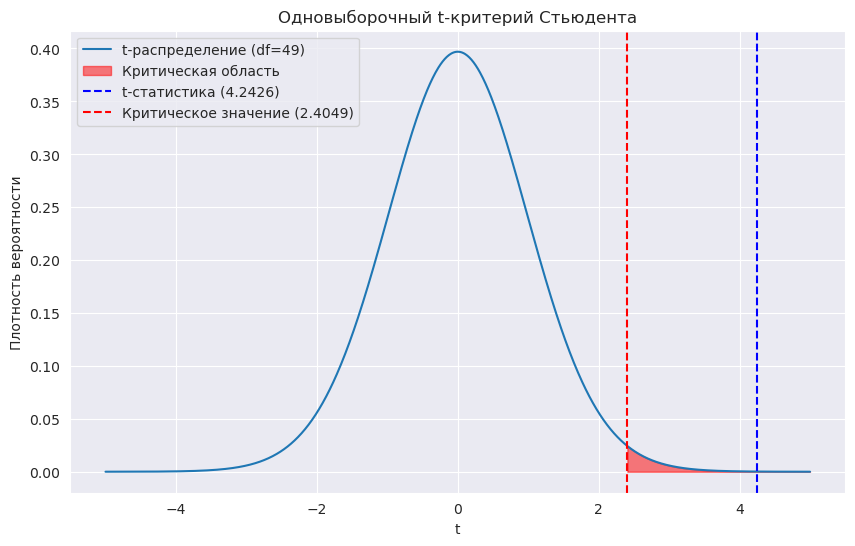

In [9]:
sample_mean = 78
sample_std = 5
n = 50
claimed_mean = 75
alpha = 0.01

t_stat = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))

df = n - 1
critical_t = stats.t.ppf(1 - alpha, df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if t_stat > critical_t:
    print("Отвергаем нулевую гипотезу. Успеваемость студентов улучшилась.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что успеваемость студентов улучшилась.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x >= critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Одновыборочный t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 7 (1 балл)

Производитель утверждает, что его новый процессор работает на 20% быстрее предыдущей модели. Для проверки этого заявления были протестированы 40 новых и 40 старых процессоров. Новые процессоры в среднем выполняли задачу за 8 секунд с стандартным отклонением 1 секунда, старые — за 10 секунд с стандартным отклонением 1,5 секунды. Соответствует ли утверждение производителя действительности на уровне значимости 2%?

t-статистика: -7.0165
Критическое значение t: 2.0887
Отвергаем нулевую гипотезу. Новый процессор работает быстрее.


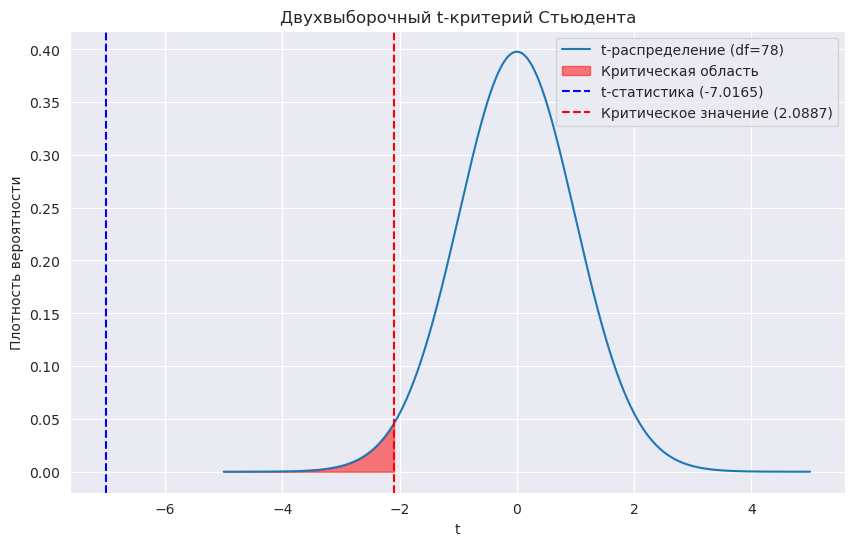

In [10]:
n1 = 40
mean1 = 8
std1 = 1

n2 = 40
mean2 = 10
std2 = 1.5

alpha = 0.02

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

df = n1 + n2 - 2
critical_t = stats.t.ppf(1 - alpha, df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if t_stat < -critical_t:
    print("Отвергаем нулевую гипотезу. Новый процессор работает быстрее.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что новый процессор работает быстрее.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x <= -critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(-critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Двухвыборочный t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 8 (1 балл)

После введения новых экологических стандартов исследователь хочет определить, снизился ли уровень загрязнения воздуха в городе. До введения стандартов средняя концентрация вредных веществ составляла 50 мкг/м³. Через год после внедрения было проведено 36 измерений, и средняя концентрация составила 47 мкг/м³ со стандартным отклонением 4 мкг/м³. Можно ли на уровне значимости 5% считать, что уровень загрязнения воздуха снизился?

t-статистика: -4.5000
Критическое значение t: -1.6896
Отвергаем нулевую гипотезу. Уровень загрязнения воздуха снизился.


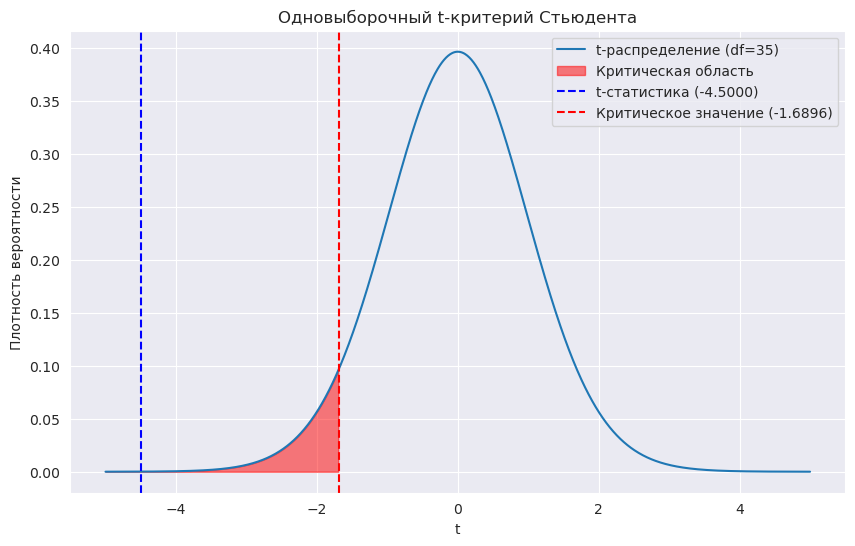

In [11]:
sample_mean = 47
sample_std = 4
n = 36
claimed_mean = 50
alpha = 0.05

t_stat = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))

df = n - 1
critical_t = stats.t.ppf(alpha, df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if t_stat < critical_t:
    print("Отвергаем нулевую гипотезу. Уровень загрязнения воздуха снизился.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что уровень загрязнения воздуха снизился.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x <= critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Одновыборочный t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 9 (1 балл)

В школе проводят эксперимент, чтобы выяснить, влияет ли дополнительное занятие по чтению на скорость чтения учеников. Учеников случайным образом разделили на две группы по 20 человек. Первая группа занималась по стандартной программе и показала среднюю скорость чтения 150 слов в минуту со стандартным отклонением 15 слов. Вторая группа посещала дополнительные занятия и показала среднюю скорость 160 слов в минуту со стандартным отклонением 10 слов. Является ли разница в скоростях статистически значимой на уровне значимости 5%?

t-статистика: -2.4807
Критическое значение t: 2.0244
Отвергаем нулевую гипотезу. Разница в скоростях чтения статистически значима.


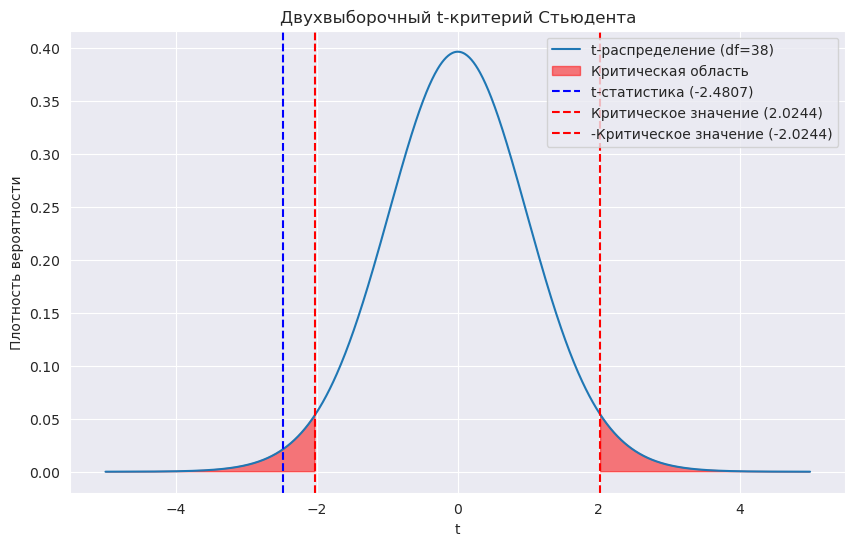

In [12]:
n1 = 20
mean1 = 150
std1 = 15

n2 = 20
mean2 = 160
std2 = 10

alpha = 0.05

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

df = n1 + n2 - 2
critical_t = stats.t.ppf(1 - alpha/2, df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if abs(t_stat) > critical_t:
    print("Отвергаем нулевую гипотезу. Разница в скоростях чтения статистически значима.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что разница в скоростях чтения статистически значима.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x >= critical_t) | (x <= -critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.axvline(-critical_t, color='red', linestyle='--', label=f'-Критическое значение ({-critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Двухвыборочный t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 10 (1 балл)

Автомобильная компания хочет определить, влияет ли новый тип топлива на эффективность расхода топлива. В тесте участвовали 30 автомобилей, использующих обычное топливо, и 30 автомобилей на новом топливе. Средний расход для обычного топлива составил 8 литров на 100 км с стандартным отклонением 0,5 литра, для нового топлива — 7,5 литров на 100 км с стандартным отклонением 0,4 литра. Проверьте на уровне значимости 1%, улучшает ли новый тип топлива эффективность.

t-статистика: 4.2770
Критическое значение t: 2.3924
Отвергаем нулевую гипотезу. Новый тип топлива улучшает эффективность расхода топлива.


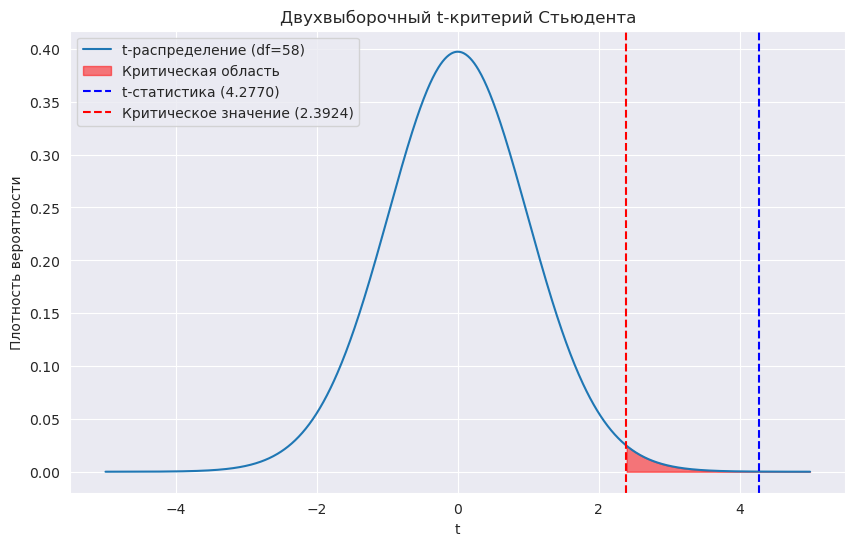

In [13]:
n1 = 30
mean1 = 8
std1 = 0.5

n2 = 30
mean2 = 7.5
std2 = 0.4

alpha = 0.01

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

df = n1 + n2 - 2
critical_t = stats.t.ppf(1 - alpha, df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if t_stat > critical_t:
    print("Отвергаем нулевую гипотезу. Новый тип топлива улучшает эффективность расхода топлива.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что новый тип топлива улучшает эффективность расхода топлива.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x >= critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Двухвыборочный t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 11 (1 балл)

В исследовании психологии изучается влияние медитации на уровень стресса. Уровень стресса измеряется по шкале от 0 до 100. До начала программы медитации у группы из 25 участников средний уровень стресса был 70 с стандартным отклонением 8. После программы средний уровень снизился до 65 с стандартным отклонением 7. Является ли снижение уровня стресса статистически значимым на уровне значимости 5%?

t-статистика: 2.3518
Критическое значение t: 1.7109
Отвергаем нулевую гипотезу. Снижение уровня стресса статистически значимо.


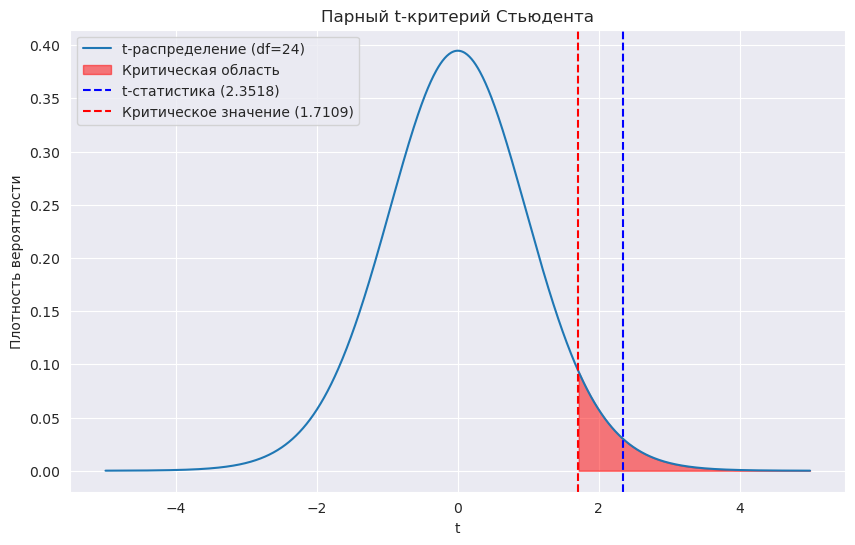

In [14]:
n = 25
mean_before = 70
std_before = 8
mean_after = 65
std_after = 7

alpha = 0.05

mean_diff = mean_before - mean_after
std_diff = np.sqrt(std_before**2 + std_after**2)

t_stat = mean_diff / (std_diff / np.sqrt(n))

df = n - 1
critical_t = stats.t.ppf(1 - alpha, df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение t: {critical_t:.4f}")

if t_stat > critical_t:
    print("Отвергаем нулевую гипотезу. Снижение уровня стресса статистически значимо.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что снижение уровня стресса статистически значимо.")

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение (df={df})')
plt.fill_between(x, y, where=(x >= critical_t), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика ({t_stat:.4f})')
plt.axvline(critical_t, color='red', linestyle='--', label=f'Критическое значение ({critical_t:.4f})')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Парный t-критерий Стьюдента')
plt.legend()
plt.show()

### Задача 12 (1 балл)

Компания по производству напитков изменила рецепт своего продукта и хочет определить, повлияло ли это на предпочтения потребителей. В тестировании участвовали 200 человек, из которых 110 предпочли новый рецепт, а остальные остались нейтральны или выбрали старый. Можно ли на уровне значимости 1% утверждать, что большинство потребителей предпочитают новый рецепт?

z-статистика: 1.4142
Критическое значение z: 2.3263
Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что большинство потребителей предпочитают новый рецепт.


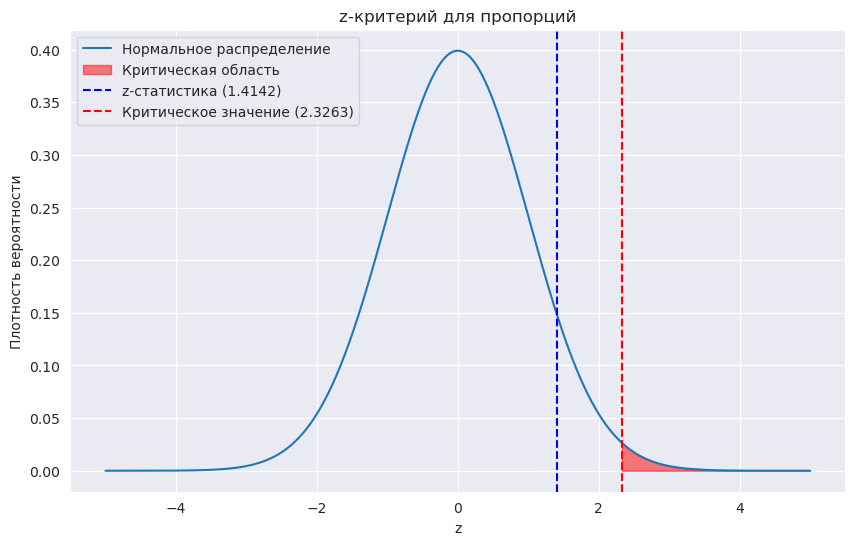

In [15]:
n = 200
p_observed = 110 / n
p_hypothesized = 0.5
alpha = 0.01

z_stat = (p_observed - p_hypothesized) / np.sqrt(p_hypothesized * (1 - p_hypothesized) / n)

critical_z = stats.norm.ppf(1 - alpha)

print(f"z-статистика: {z_stat:.4f}")
print(f"Критическое значение z: {critical_z:.4f}")

if z_stat > critical_z:
    print("Отвергаем нулевую гипотезу. Большинство потребителей предпочитают новый рецепт.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что большинство потребителей предпочитают новый рецепт.")

x = np.linspace(-5, 5, 1000)
y = stats.norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение')
plt.fill_between(x, y, where=(x >= critical_z), color='red', alpha=0.5, label='Критическая область')
plt.axvline(z_stat, color='blue', linestyle='--', label=f'z-статистика ({z_stat:.4f})')
plt.axvline(critical_z, color='red', linestyle='--', label=f'Критическое значение ({critical_z:.4f})')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')
plt.title('z-критерий для пропорций')
plt.legend()
plt.show()

### Задача 13 (1 балл)

В ходе эксперимента изучается влияние нового удобрения на рост растений. Группе из 15 растений добавляли новое удобрение, и средний рост составил 25 см с стандартным отклонением 3 см. Контрольная группа из 15 растений без удобрения показала средний рост 22 см с стандартным отклонением 2,5 см. Проверить на уровне значимости 5%, является ли разница в росте статистически значимой.

In [16]:
n_control = 15
mean_control = 22
std_control = 2.5

n_fertilized = 15
mean_fertilized = 25
std_fertilized = 3

alpha = 0.05

df = n_control + n_fertilized - 2
sp2 = ((n_control - 1)*std_control**2 + (n_fertilized - 1)*std_fertilized**2) / df

std_error = np.sqrt(sp2 * (1/n_control + 1/n_fertilized))
t_stat = (mean_fertilized - mean_control) / std_error

x_critical = stats.t.ppf(1-alpha, df)

p_value = 1 - stats.t.cdf(t_stat, df)

Объединенная выборочная дисперсия (sp^2): 7.6250
Стандартная ошибка (SE): 1.0083
Критическое значение t: 1.7011
t-статистика: 2.9753
p-значение: 0.0030
Отвергаем нулевую гипотезу: разница в росте статистически значима.


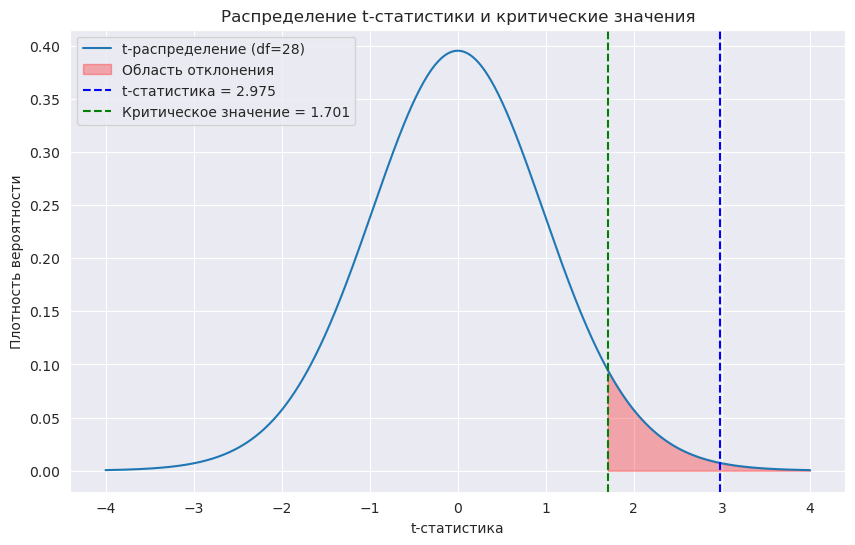

In [17]:
print(f"Объединенная выборочная дисперсия (sp^2): {sp2:.4f}")
print(f"Стандартная ошибка (SE): {std_error:.4f}")
print(f"Критическое значение t: {x_critical:.4f}")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: разница в росте статистически значима.")
else:
    print("Не отвергаем нулевую гипотезу: разница в росте не является статистически значимой.")

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"t-распределение (df={df})")
plt.fill_between(x, y, where=(x > x_critical), color='red', alpha=0.3, label='Область отклонения')

plt.axvline(t_stat, color='blue', linestyle='--', label=f't-статистика = {t_stat:.3f}')

plt.axvline(x_critical, color='green', linestyle='--', label=f'Критическое значение = {x_critical:.3f}')

plt.title("Распределение t-статистики и критические значения")
plt.xlabel("t-статистика")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()

### Задача 14 (5 баллов за все пункты)

Пункт 1. Компания внедряет новую программу обучения сотрудников с целью повышения производительности труда. Ранее средняя производительность составляла 50 единиц в день при стандартном отклонении 8 единиц. После года действия программы случайно выбранная выборка из 80 сотрудников показала среднюю производительность 52 единицы. Считаем, что стандартное отклонение осталось неизменным. Можно ли на основе этих данных утверждать, что программа обучения действительно повысила производительность, или наблюдаемый результат мог возникнуть случайно? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста (двусторонний, левосторонний или правосторонний) и проверьте нулевую гипотезу на уровнях значимости α = 1% и α = 5%.


---

Пункт 2. Решите пункт 1, если выборка состоит лишь из 5 сотрудников.


---

Пункт 3. Решите пункт 1 при условии, что стандартное отклонение увеличилось до 16 единиц.


---

Пункт 4. Решите пункт 1, если после внедрения программы средняя производительность составила 51 единицу.


---

Пункт 5. Решите пункт 1, если стандартное отклонение неизвестно, а выборка составила 25 сотрудников. Несмещённая оценка дисперсии выборки составила 64. Примите уровень значимости равным 5%.

In [18]:
def print_results(t_statistic, df, alpha_1 = 0.01,  alpha_5 = 0.05):

  print(f"t-статистика: {t_statistic:.4f}")

  if alpha_1:
    critical_t_1 = stats.t.ppf(1 - alpha_1, df)
    print(f"Критическое значение t для α = 1%: {critical_t_1:.4f}")

  if alpha_5:
    critical_t_5 = stats.t.ppf(1 - alpha_5, df)
    print(f"Критическое значение t для α = 5%: {critical_t_5:.4f}")

  if alpha_1:
    if t_statistic > critical_t_1:
        print("Отвергаем нулевую гипотезу на уровне значимости 1%.")
    else:
        print("Не отвергаем нулевую гипотезу на уровне значимости 1%.")

  if alpha_5:
    if t_statistic > critical_t_5:
        print("Отвергаем нулевую гипотезу на уровне значимости 5%.")
    else:
        print("Не отвергаем нулевую гипотезу на уровне значимости 5%.")

  x = np.linspace(-5, 5, 1000)
  y = stats.t.pdf(x, df)

  plt.figure(figsize=(10, 6))
  plt.plot(x, y, label=f't-распределение (df={df})')

  if alpha_1:
    plt.axvline(critical_t_1, color='red', linestyle='--', label=f'Критическое значение ({critical_t_1:.4f})')
    plt.fill_between(x, y, where=(x >= critical_t_1), color='red', alpha=0.5, label='Критическая область для α = 1%')

  if alpha_5:
    plt.axvline(critical_t_5, color='orange', linestyle='--', label=f't-статистика ({critical_t_5:.4f})')

  if alpha_1 and alpha_5:
    plt.fill_between(x, y, where=(x >= critical_t_5) & (x < critical_t_1), color='orange', alpha=0.5, label='Критическая область для α = 5%')
  elif alpha_5:
    plt.fill_between(x, y, where=(x >= critical_t_5), color='orange', alpha=0.5, label='Критическая область для α = 5%')

  plt.axvline(t_statistic, color='blue', linestyle='--', label=f't-статистика = {t_statistic:.4f}')
  plt.xlabel('t-статистика')
  plt.ylabel('Плотность вероятности')
  plt.title('Распределение t-статистики и критические значения')
  plt.legend()
  plt.grid(True)
  plt.show()

t-статистика: 2.2361
Критическое значение t для α = 1%: 2.3745
Критическое значение t для α = 5%: 1.6644
Не отвергаем нулевую гипотезу на уровне значимости 1%.
Отвергаем нулевую гипотезу на уровне значимости 5%.


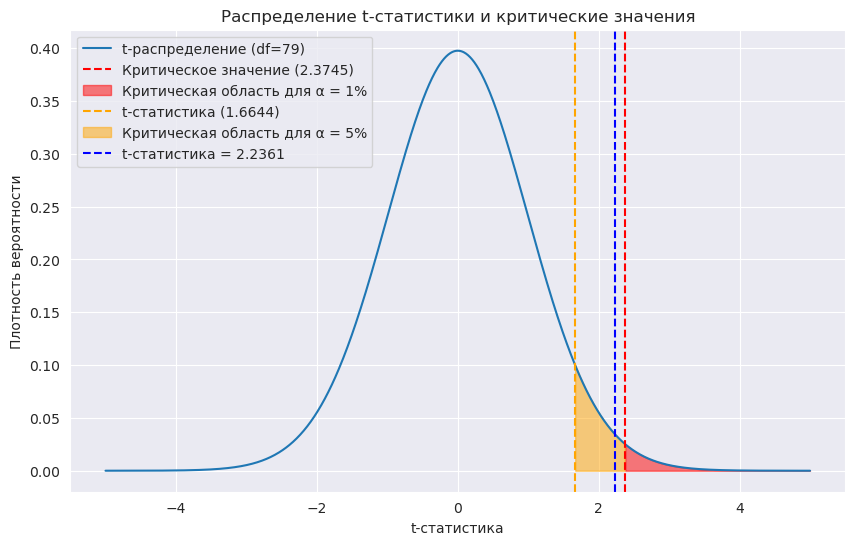

In [19]:
sample_mean = 52
sample_size = 80
population_mean = 50
population_std = 8

standard_error = population_std / np.sqrt(sample_size)

t_statistic = (sample_mean - population_mean) / standard_error

print_results(t_statistic, sample_size - 1)

t-статистика: 0.5590
Критическое значение t для α = 1%: 3.7469
Критическое значение t для α = 5%: 2.1318
Не отвергаем нулевую гипотезу на уровне значимости 1%.
Не отвергаем нулевую гипотезу на уровне значимости 5%.


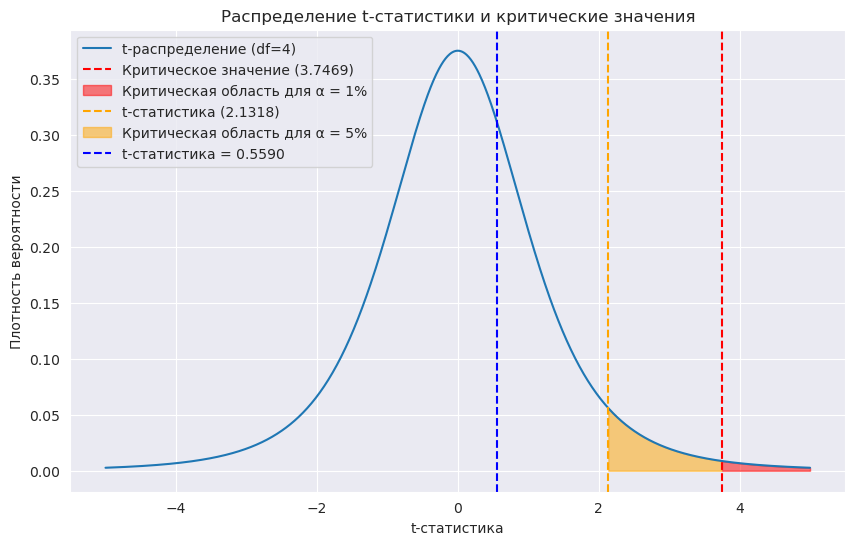

In [20]:
sample_mean = 52
sample_size = 5
population_mean = 50
population_std = 8

standard_error = population_std / np.sqrt(sample_size)

t_statistic = (sample_mean - population_mean) / standard_error

alpha_1 = 0.01
alpha_5 = 0.05
df = sample_size - 1

print_results(t_statistic, sample_size - 1)

t-статистика: 1.1180
Критическое значение t для α = 1%: 2.3745
Критическое значение t для α = 5%: 1.6644
Не отвергаем нулевую гипотезу на уровне значимости 1%.
Не отвергаем нулевую гипотезу на уровне значимости 5%.


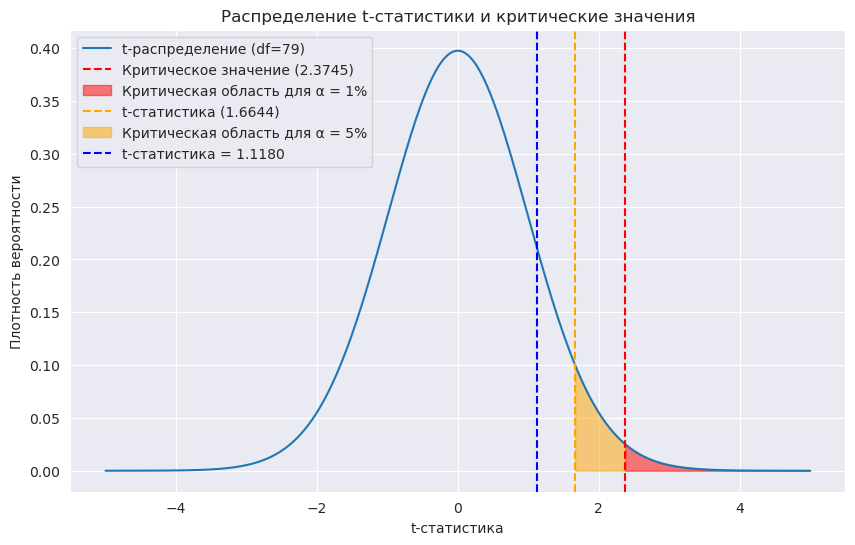

In [21]:
sample_mean = 52
sample_size = 80
population_mean = 50
population_std = 16

standard_error = population_std / np.sqrt(sample_size)

t_statistic = (sample_mean - population_mean) / standard_error

print_results(t_statistic, sample_size - 1)

t-статистика: 1.1180
Критическое значение t для α = 1%: 2.3745
Критическое значение t для α = 5%: 1.6644
Не отвергаем нулевую гипотезу на уровне значимости 1%.
Не отвергаем нулевую гипотезу на уровне значимости 5%.


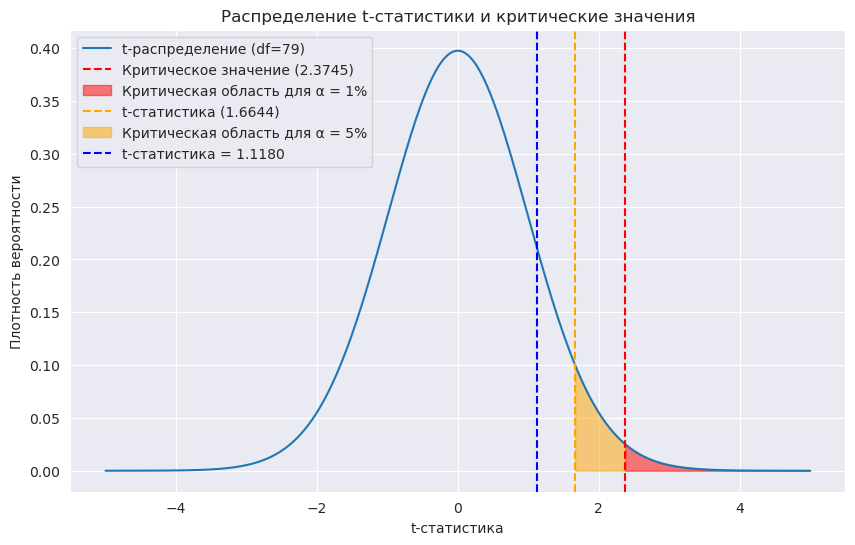

In [22]:
sample_mean = 51
sample_size = 80
population_mean = 50
population_std = 8

standard_error = population_std / np.sqrt(sample_size)

t_statistic = (sample_mean - population_mean) / standard_error

print_results(t_statistic, sample_size - 1)

t-статистика: 1.2500
Критическое значение t для α = 5%: 1.7109
Не отвергаем нулевую гипотезу на уровне значимости 5%.


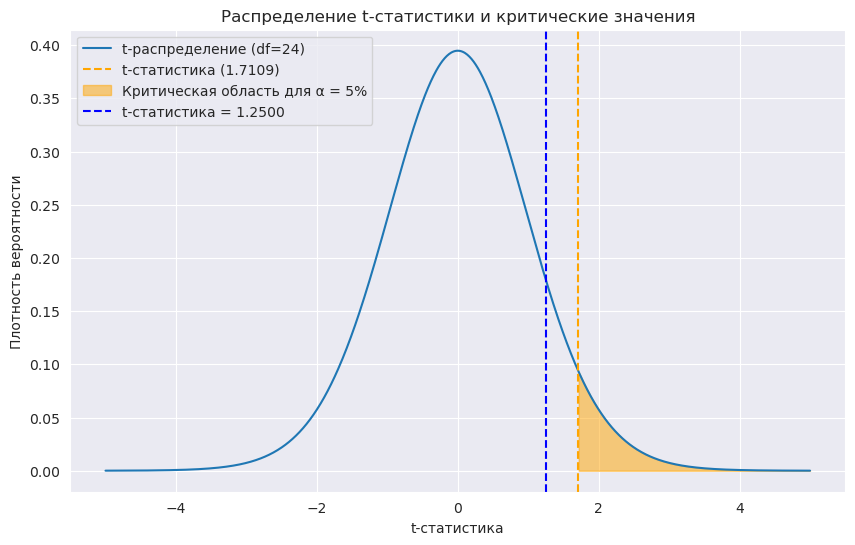

In [23]:
sample_mean = 52
sample_size = 25
population_mean = 50
sample_variance = 64

sample_std = np.sqrt(sample_variance)

standard_error = sample_std / np.sqrt(sample_size)

t_statistic = (sample_mean - population_mean) / standard_error

alpha_5 = 0.05
print_results(t_statistic, sample_size - 1, None, alpha_5)

### Задача 15 (3 балла за все пункты)

Задача 1. Компания оценивает эффективность нового программного обеспечения для повышения производительности сотрудников. Перед установкой ПО среднее время выполнения определённой задачи у 60 сотрудников составляло 100 минут с известным стандартным отклонением 12 минут. После установки нового ПО среднее время выполнения той же задачи снизилось до 95 минут. Считаем, что стандартное отклонение осталось неизменным. Можно ли на уровне значимости α = 5% утверждать, что новое ПО действительно снижает время выполнения задачи? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста и проверьте нулевую гипотезу.


---

Задача 2. Решите задачу 1, если стандартное отклонение после установки нового ПО неизвестно, а выборка составляет 25 сотрудников. По полученным данным несмещённая оценка дисперсии после установки ПО составляет 144 минуты².


---

Задача 3. Компания сравнивает эффективность двух независимых групп сотрудников: первая группа из 50 человек использует старое ПО, вторая группа из 50 человек — новое ПО. Среднее время выполнения задачи в первой группе составляет 100 минут со стандартным отклонением 12 минут, во второй группе — 95 минут со стандартным отклонением 12 минут. Можно ли на уровне значимости α = 5% утверждать, что новое ПО снижает время выполнения задачи по сравнению со старым?


---

Задача 4. Для оценки влияния обучающего курса на навыки сотрудников компания измеряет время выполнения задачи у 30 сотрудников до и после прохождения курса. Среднее время до обучения составляет 80 минут, после обучения — 75 минут. Известно, что стандартное отклонение разностей времени (до и после) составляет 5 минут. Можно ли на уровне значимости α = 1% утверждать, что обучение улучшило навыки сотрудников? Сформулируйте нулевую и альтернативную гипотезы и выберите подходящий статистический тест.


---

Задача 5. Решите задачу 4, если стандартное отклонение разностей времени неизвестно, а несмещённая оценка дисперсии разностей составляет 25 минут². Примите уровень значимости равным 1%.

**Сформулируем нулевую и альтернативную гипотезы:**
   - **Нулевая гипотеза (H0):** Среднее время выполнения задачи до и после внедрения ПО одинаково, т.е. $( \mu_1 = \mu_2 )$.
   - **Альтернативная гипотеза (H1):** Среднее время выполнения задачи после внедрения ПО меньше, чем до, т.е. $( \mu_1 > \mu_2 )$.

Рассчитанное значение z: 3.2275
Критическое значение z: 1.6449
Отвергаем нулевую гипотезу. Новое ПО действительно снижает время выполнения задачи.


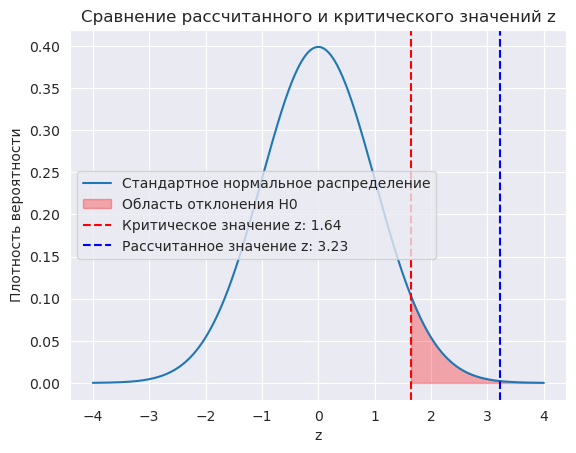

In [24]:
mean_before = 100
mean_after = 95
std_dev = 12
n = 60
alpha = 0.05

z_stat = (mean_before - mean_after) / (std_dev / np.sqrt(n))
z_critical = stats.norm.ppf(1 - alpha)

print(f"Рассчитанное значение z: {z_stat:.4f}")
print(f"Критическое значение z: {z_critical:.4f}")

if z_stat > z_critical:
    print("Отвергаем нулевую гипотезу. Новое ПО действительно снижает время выполнения задачи.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, что новое ПО снижает время выполнения задачи.")

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.3, label='Область отклонения H0')

plt.axvline(x=z_critical, color='red', linestyle='--', label=f'Критическое значение z: {z_critical:.2f}')
plt.axvline(x=z_stat, color='blue', linestyle='--', label=f'Рассчитанное значение z: {z_stat:.2f}')

plt.xlabel('z')
plt.ylabel('Плотность вероятности')
plt.title('Сравнение рассчитанного и критического значений z')
plt.legend()
plt.grid(True)
plt.show()

Рассчитанное значение t: 2.0833
Критическое значение t: 1.6711
Отвергаем нулевую гипотезу. Новое ПО действительно снижает время выполнения задачи.


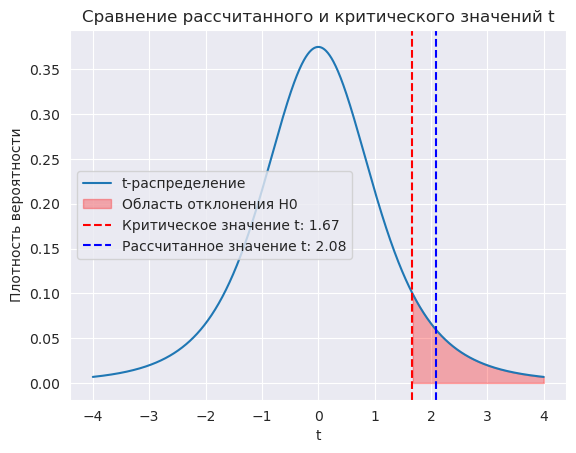

In [25]:
n1 = 60
mean_before = 100

n2 = 25
mean_after = 95

var = 144
alpha = 0.05


t_stat = (mean_before - mean_after) / np.sqrt(var/n2)

t_critical = stats.t.ppf(1 - alpha, n1 - 1)

print(f"Рассчитанное значение t: {t_stat:.4f}")
print(f"Критическое значение t: {t_critical:.4f}")

if t_stat > t_critical:
    print("Отвергаем нулевую гипотезу. Новое ПО действительно снижает время выполнения задачи.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, что новое ПО снижает время выполнения задачи.")

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.plot(x, y, label='t-распределение')
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.3, label='Область отклонения H0')

plt.axvline(x=t_critical, color='red', linestyle='--', label=f'Критическое значение t: {t_critical:.2f}')

plt.axvline(x=t_stat, color='blue', linestyle='--', label=f'Рассчитанное значение t: {t_stat:.2f}')

plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Сравнение рассчитанного и критического значений t')
plt.legend()
plt.grid(True)
plt.show()

t-статистика: 2.0833
Критическое значение: 1.6606
Отвергаем нулевую гипотезу. Новое ПО действительно снижает время выполнения задачи.


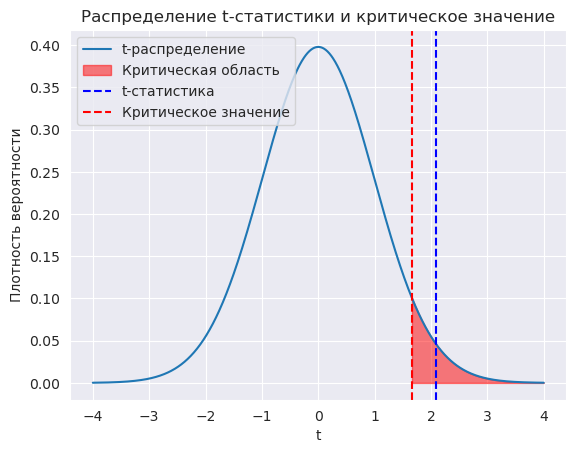

In [26]:
n1 = 50
mean_before = 100
std_dev_before = 12

n2 = 50
mean_after = 95
std_dev_after = 12

alpha = 0.05

t_stat, p_value = stats.ttest_ind_from_stats(
    mean1=mean_before, std1=std_dev_before, nobs1=n1,
    mean2=mean_after, std2=std_dev_after, nobs2=n2,
    equal_var=True
)

df = n1 + n2 - 2
critical_value = stats.t.ppf(1 - alpha, df=df)

print(f"t-статистика: {t_stat:.4f}")
print(f"Критическое значение: {critical_value:.4f}")

if t_stat > critical_value:
    print("Отвергаем нулевую гипотезу. Новое ПО действительно снижает время выполнения задачи.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, что новое ПО снижает время выполнения задачи.")

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=df)

plt.plot(x, y, label='t-распределение')
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label='Критическая область')
plt.axvline(t_stat, color='blue', linestyle='--', label='t-статистика')
plt.axvline(critical_value, color='red', linestyle='--', label='Критическое значение')
plt.legend()
plt.title('Распределение t-статистики и критическое значение')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.show()

**Сформулируем нулевую и альтернативную гипотезы:**
   - **Нулевая гипотеза (H0):** Среднее время выполнения задачи до и после обучения одинаково, т.е. $( \mu_d = 0 )$.
   - **Альтернативная гипотеза (H1):** Среднее время выполнения задачи после обучения меньше, чем до обучения, т.е. $( \mu_d < 0 )$.

Рассчитанное значение t: -5.4772
Критическое значение t: -2.4620
Отвергаем нулевую гипотезу. Обучение улучшило навыки сотрудников.


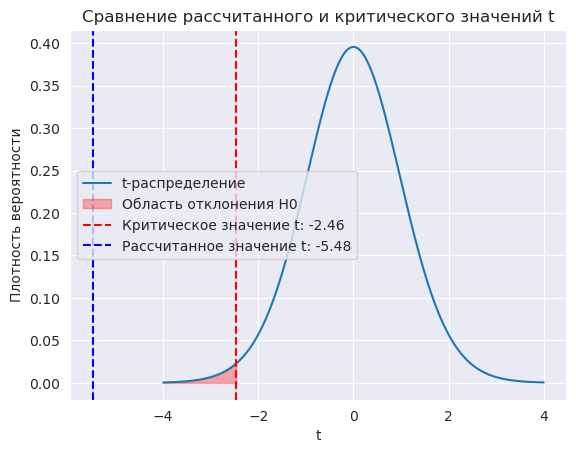

In [27]:
mean_before = 80
mean_after = 75
std_dev_diff = 5
n = 30
alpha = 0.01

mean_diff = mean_after - mean_before

t_stat = mean_diff / (std_dev_diff / np.sqrt(n))

t_critical = stats.t.ppf(alpha, n - 1)

print(f"Рассчитанное значение t: {t_stat:.4f}")
print(f"Критическое значение t: {t_critical:.4f}")

if t_stat < t_critical:
    print("Отвергаем нулевую гипотезу. Обучение улучшило навыки сотрудников.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, что обучение улучшило навыки сотрудников.")

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, n - 1)

plt.plot(x, y, label='t-распределение')
plt.fill_between(x, y, where=(x <= t_critical), color='red', alpha=0.3, label='Область отклонения H0')

plt.axvline(x=t_critical, color='red', linestyle='--', label=f'Критическое значение t: {t_critical:.2f}')

plt.axvline(x=t_stat, color='blue', linestyle='--', label=f'Рассчитанное значение t: {t_stat:.2f}')

plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Сравнение рассчитанного и критического значений t')
plt.legend()
plt.grid(True)
plt.show()

Рассчитанное значение t: -5.4772
Критическое значение t: -2.4620
Отвергаем нулевую гипотезу. Обучение улучшило навыки сотрудников.


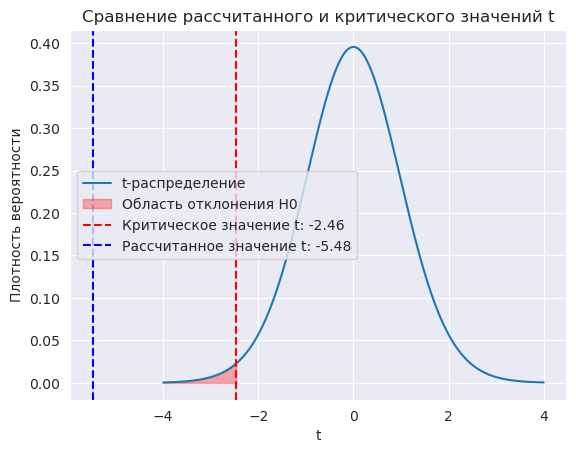

In [28]:
mean_before = 80
mean_after = 75
var_diff = 25
std_dev_diff = np.sqrt(var_diff)
n = 30
alpha = 0.01

mean_diff = mean_after - mean_before

t_stat = mean_diff / (std_dev_diff / np.sqrt(n))

t_critical = stats.t.ppf(alpha, n - 1)

print(f"Рассчитанное значение t: {t_stat:.4f}")
print(f"Критическое значение t: {t_critical:.4f}")

if t_stat < t_critical:
    print("Отвергаем нулевую гипотезу. Обучение улучшило навыки сотрудников.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, что обучение улучшило навыки сотрудников.")

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, n - 1)

plt.plot(x, y, label='t-распределение')
plt.fill_between(x, y, where=(x <= t_critical), color='red', alpha=0.3, label='Область отклонения H0')

plt.axvline(x=t_critical, color='red', linestyle='--', label=f'Критическое значение t: {t_critical:.2f}')

plt.axvline(x=t_stat, color='blue', linestyle='--', label=f'Рассчитанное значение t: {t_stat:.2f}')

plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.title('Сравнение рассчитанного и критического значений t')
plt.legend()
plt.grid(True)
plt.show()

### Задача 16 (4 балла за все пункты)

Монетку подбросили n=150 раз. Из них выпало Y орлов. Вероятность выпадения орла равна p.

(a) При каких значениях Y вы отвергнете нулевую гипотезу H0:p=1/2 против односторонней альтернативы p>1/2 на уровне значимости α=0.05?

(b) Предположим, что на самом деле H0​ не выполняется, а выполняется H1​, и вероятность выпадения орла равна p=1/2+δ, где δ=1/10. При этом мы не знаем точное значение p, но действуем согласно нашему критерию. С какой вероятностью мы при этом отвергнем гипотезу H0​? Какова вероятность совершить ошибку второго рода (не отвергнуть H0​, когда H1​ истинна)?

(c) Решите ту же задачу для δ=1/100.

(d) Решите ту же задачу для δ=1/100 и n=1000.

In [29]:
n = 150
p = 0.5
alpha = 0.05

critical_value = stats.binom.ppf(1 - alpha, n, p)
print(f"Критическое значение Y: {critical_value}")

# Отвергнем H0, если Y >= critical_value

Критическое значение Y: 85.0


Вероятность отвергнуть H0 при p = 0.6: 0.8205623354126607
Вероятность ошибки второго рода: 0.17943766458733934


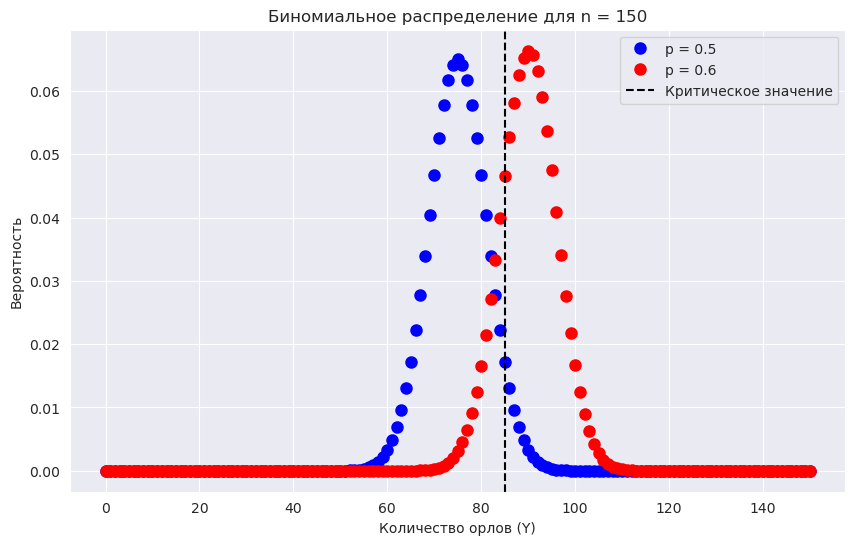

In [30]:
delta = 1/10
p_alt = 0.5 + delta

power = 1 - stats.binom.cdf(critical_value - 1, n, p_alt)
print(f"Вероятность отвергнуть H0 при p = {p_alt}: {power}")

beta = stats.binom.cdf(critical_value - 1, n, p_alt)
print(f"Вероятность ошибки второго рода: {beta}")

plt.figure(figsize=(10, 6))
x = np.arange(0, n + 1)
plt.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='p = 0.5')
plt.plot(x, stats.binom.pmf(x, n, p_alt), 'ro', ms=8, label=f'p = {p_alt}')
plt.axvline(critical_value, color='k', linestyle='--', label='Критическое значение')
plt.xlabel('Количество орлов (Y)')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение для n = 150')
plt.legend()
plt.show()

Вероятность отвергнуть H0 при p = 0.51: 0.09551229876927936
Вероятность ошибки второго рода: 0.9044877012307206


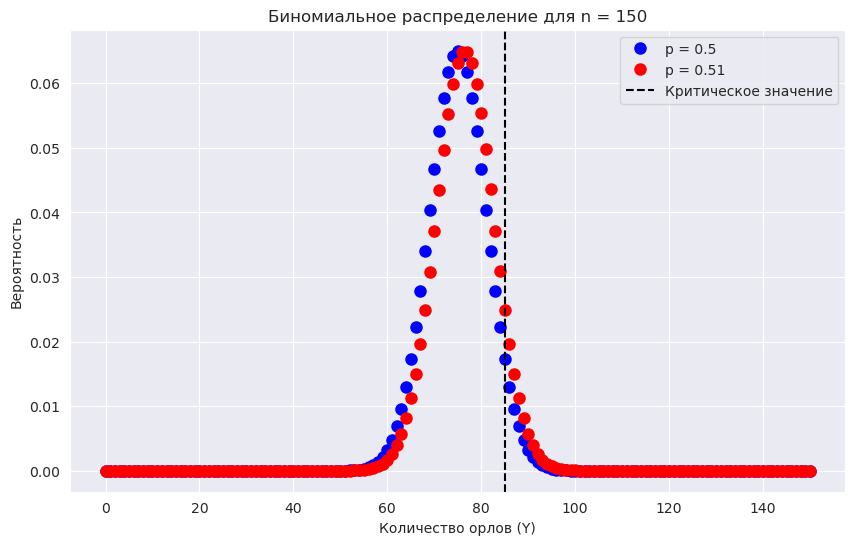

In [31]:
delta = 1/100
p_alt = 0.5 + delta

power = 1 - stats.binom.cdf(critical_value - 1, n, p_alt)
print(f"Вероятность отвергнуть H0 при p = {p_alt}: {power}")

beta = stats.binom.cdf(critical_value - 1, n, p_alt)
print(f"Вероятность ошибки второго рода: {beta}")

plt.figure(figsize=(10, 6))
x = np.arange(0, n + 1)
plt.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='p = 0.5')
plt.plot(x, stats.binom.pmf(x, n, p_alt), 'ro', ms=8, label=f'p = {p_alt}')
plt.axvline(critical_value, color='k', linestyle='--', label='Критическое значение')
plt.xlabel('Количество орлов (Y)')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение для n = 150')
plt.legend()
plt.show()

Критическое значение Y: 526.0
Вероятность отвергнуть H0 при p = 0.51: 0.1634219539051025
Вероятность ошибки второго рода: 0.8365780460948975


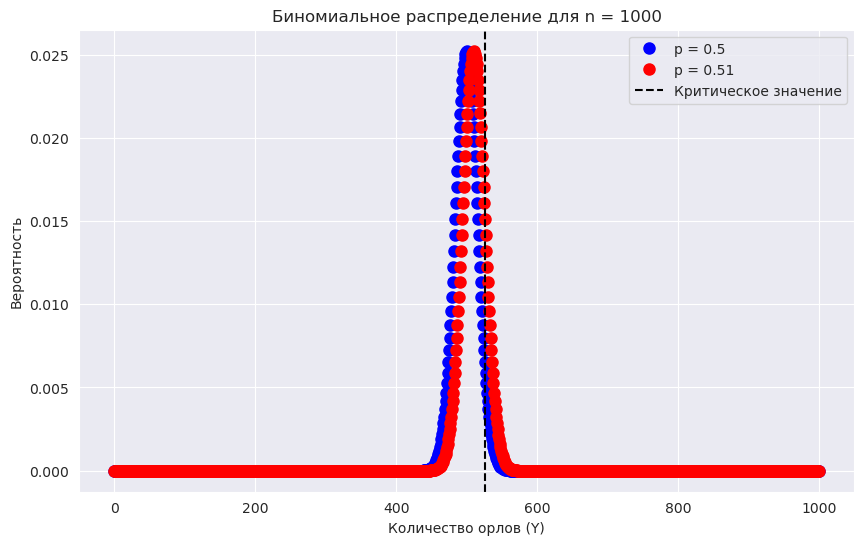

In [32]:
n = 1000
delta = 1/100
p_alt = 0.5 + delta

critical_value = stats.binom.ppf(1 - alpha, n, p)
print(f"Критическое значение Y: {critical_value}")

power = 1 - stats.binom.cdf(critical_value - 1, n, p_alt)
print(f"Вероятность отвергнуть H0 при p = {p_alt}: {power}")

beta = stats.binom.cdf(critical_value - 1, n, p_alt)
print(f"Вероятность ошибки второго рода: {beta}")

plt.figure(figsize=(10, 6))
x = np.arange(0, n + 1)
plt.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='p = 0.5')
plt.plot(x, stats.binom.pmf(x, n, p_alt), 'ro', ms=8, label=f'p = {p_alt}')
plt.axvline(critical_value, color='k', linestyle='--', label='Критическое значение')
plt.xlabel('Количество орлов (Y)')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение для n = 1000')
plt.legend()
plt.show()